In [2]:
import tensorflow as tf
from utils.architectures import resnet_152
from utils.plot import getAccuracyPlot, getLossPlot

In [3]:
cifar100 = tf.keras.datasets.cifar100 #load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 100) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 100) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 100

In [8]:
model = resnet_152(output_size)

In [9]:

model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 2048)              58370944  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               204900    
Total params: 58,575,844
Trainable params: 58,424,420
Non-trainable params: 151,424
_________________________________________________________________


In [11]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=100)

Epoch 1/100
625/625 [==============================] - 114s 156ms/step - loss: 4.8876 - accuracy: 0.0248 - val_loss: 5.6031 - val_accuracy: 0.0105
Epoch 2/100
625/625 [==============================] - 94s 150ms/step - loss: 4.3264 - accuracy: 0.0437 - val_loss: 5.7644 - val_accuracy: 0.0216
Epoch 3/100
625/625 [==============================] - 94s 150ms/step - loss: 4.1431 - accuracy: 0.0615 - val_loss: 4.5414 - val_accuracy: 0.0491
Epoch 4/100
625/625 [==============================] - 93s 149ms/step - loss: 3.8138 - accuracy: 0.1026 - val_loss: 4.3793 - val_accuracy: 0.0826
Epoch 5/100
625/625 [==============================] - 93s 149ms/step - loss: 3.7031 - accuracy: 0.1217 - val_loss: 3.9266 - val_accuracy: 0.1118
Epoch 6/100
625/625 [==============================] - 94s 150ms/step - loss: 3.5654 - accuracy: 0.1433 - val_loss: 3.6087 - val_accuracy: 0.1401
Epoch 7/100
625/625 [==============================] - 93s 150ms/step - loss: 3.3730 - accuracy: 0.1694 - val_loss: 3.5477 

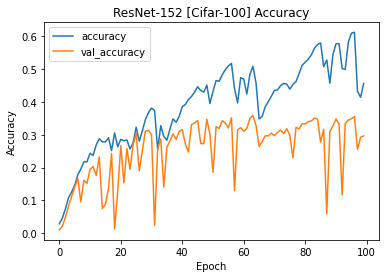

In [12]:
getAccuracyPlot(history, 'ResNet-152 [Cifar-100]')

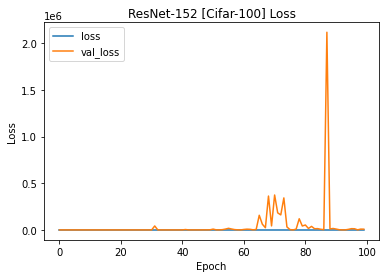

In [13]:
getLossPlot(history, 'ResNet-152 [Cifar-100]')

In [14]:
model.save('cifar100_resnet152_epoch100.h5')

In [4]:
from tensorflow.keras.models import load_model
model = load_model('cifar100_resnet152_epoch100.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 15s 31ms/step - loss: 6758.3286 - accuracy: 0.3107


[6758.32861328125, 0.310699999332428]